# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


**Цель исследования:**
1. Определить рыночную стоимость объектов недвижимости
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность
3. Установить, какие факторы влияют на ценообразование стоимости квартир

**Этапы исследования**
1. Обзор данных
2. Предобработка данных
3. Расчеты и добавление результатов в таблицу
4. Проведение анализа для Ленинградской области
5. Проведение анализа для Санкт-Петербурга
6. Различаются ли факторы, которые влияют на ценообразование квартир
7. Общие выводы

## Откройте файл с данными и изучите общую информацию. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
data.head(20) #Выводим первые 20 строчек датафрейма data на экран.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info() #Выводим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Типы данных соответствуют по столбцам.

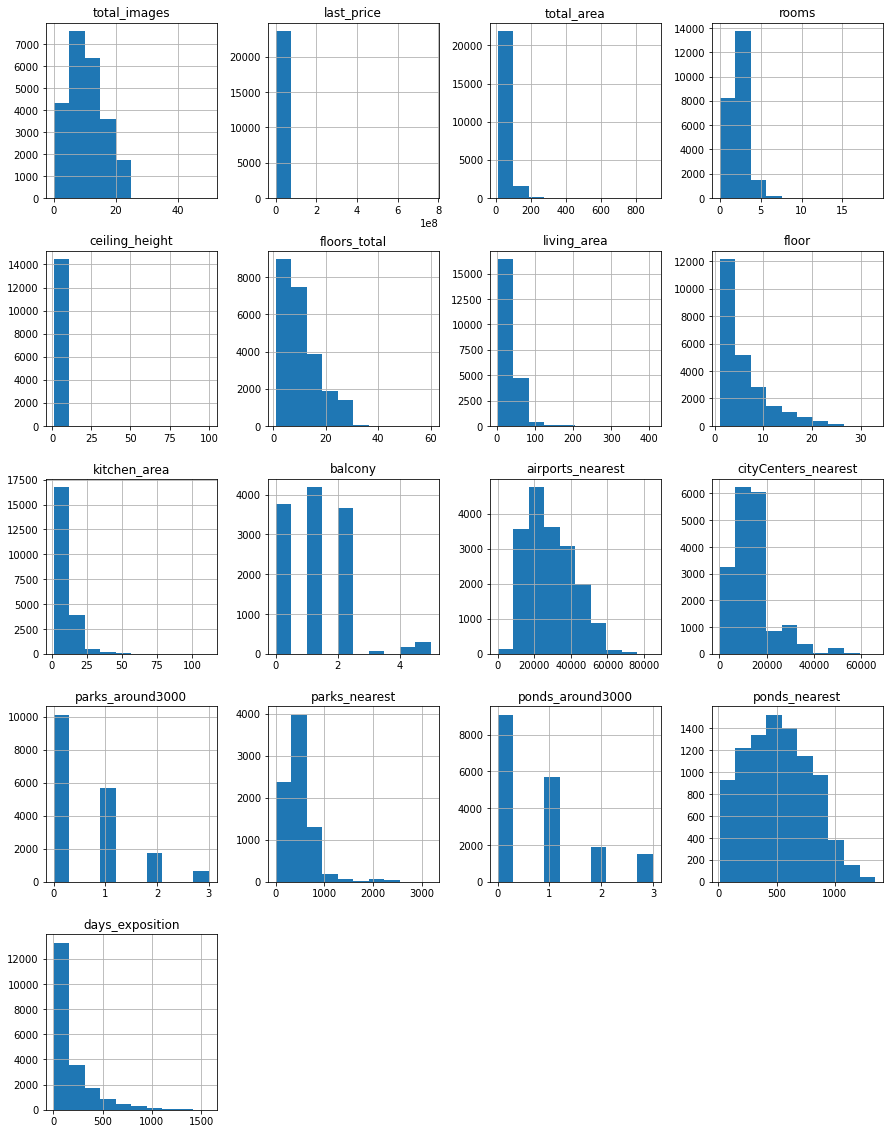

In [3]:
data.hist(figsize=(15, 20)); #Построим общую гистограмму для всех числовых столбцов таблицы.

## Предобработка данных

### Изучение пропусков

Выводим количество пропущенных значений для каждого столбца.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Минимальное _количество комнат_ равно нулю.

In [7]:
data.query('rooms == 0')['kitchen_area'].unique()

array([nan])

In [8]:
data.query('rooms == 0 and studio == False').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,NaN,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


***Вывод:***
   При количестве комнат равном нулю во всех случаях наличие кухни не указано (значение "NaN"). Возможно, это квартиры-студии. При этом существуют квартиры, тип которых не является студией по таблице. Скорее всего вид квартиры указан неверно. Поэтому оставляем нулевые значения для количества комнат.

In [9]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Удаляем записи, где отсутствует название населенного пункта и количество этажей в доме

In [10]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

#### Заменяем на нулевые значения

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

#### Заменяем пустые значения жилой площади и площади кухни

In [12]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

In [13]:
data.isna().sum() # Проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Типы данных

Изменение формата вывода даты и времени по столбцу **first_day_exposition**

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,90.816648,9,False,...,27.836861,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [15]:
# Приводим в целочисленный тип
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

In [16]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.816648,9,False,...,27.836861,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


### Дубликаты явные и неявные

In [17]:
data.duplicated().sum() # Определяем количество полных дубликатов

0

In [18]:
unique_local_name = set(data['locality_name'].unique()) #уникальные значения
#в алфавитном порядке для столбца "locality_name"
print(len(unique_local_name))
unique_local_name

364


{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

 В столбце с названиями имеются неявные дубликаты (к примеру 'городской посёлок Рощино', 'поселок городского типа Рощино', 'посёлок городского типа Рощино', 'городской посёлок Рощино'), их необходимо переименовать. Также есть поселки без названия 'поселок', 'деревня' или 'село', такие как Любань, Мурино, Никольское, Кудрово

In [19]:
data.locality_name = data.locality_name.str.replace(
    'ё', 'е') #замена буквы "ё" на "е"

#Замена на однотипные значения:
data.locality_name = data.locality_name.str.replace(
    'поселок городского типа', 'поселок') 
data.locality_name = data.locality_name.str.replace(
    'городской поселок', 'поселок')

data.locality_name = data.locality_name.str.replace(
    'поселок Любань', 'Любань')
data.locality_name = data.locality_name.str.replace(
    'поселок Мурино', 'Мурино')
data.locality_name = data.locality_name.str.replace(
    'село Никольское', 'Никольское')
data.locality_name = data.locality_name.str.replace(
    'деревня Кудрово', 'Кудрово')

sorted_locality_name = set(data['locality_name'].unique()) #уникальные значения в алфавитном порядке
print(len(sorted_locality_name)) #количество уникальных значений после удаления дубликатов

sorted_locality_name

318


{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

### Редкие и выбивающиеся значения

#### Высота потолков *ceiling_height*

Возьмем среднюю высоту потолка в квартире 2.65 м.

In [20]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65) # Заменим пропуски на среднее значение

Потолков выше 9 и ниже 2 метров не бывает. Проверим какие значения не соответствуют этим параметрам.

In [21]:
unique_ceiling_height = data.query('ceiling_height < 2 or ceiling_height > 9')['ceiling_height'].unique()
unique_ceiling_height.sort()
unique_ceiling_height

array([  1.  ,   1.2 ,   1.75,  10.3 ,  14.  ,  20.  ,  22.6 ,  24.  ,
        25.  ,  26.  ,  27.  ,  27.5 ,  32.  , 100.  ])

Имеются значения, где высота потолков в интервале 20-90 похоже, что запятую не поставили. Разделим эти значения >= 20 на 10

In [22]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10     

Теперь все значения, меньше 2 метров и больше 9 метров приравняем к среднему.

In [23]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.65
data.loc[data['ceiling_height'] > 9, 'ceiling_height'] = 2.65

Проверяем столбец **ceiling_height**

In [24]:
unique_ceiling_height = data['ceiling_height'].unique()
unique_ceiling_height.sort()
unique_ceiling_height

array([2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48,
       2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
       2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 ,
       2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92,
       2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03,
       3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14,
       3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37,
       3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49,
       3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 ,
       3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78,
       3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95,
       3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.

***Вывод:***

В столбце **высота потолков** было 39% пропусков и ошибочные значения. В результате предобработки пропуски и выбивающиеся значения после 90 м заменены на среднюю высоту потолков. Значения, увеличенные в 10 раз, уменьшены соответственно.

## Посчитайте и добавьте в таблицу новые столбцы

In [25]:
# Добавляем столбец со стоимостью квадратного метра и приводим его в целочисленный тип
data['square_meter_price'] = data['last_price'] / data['total_area']
data['square_meter_price'] = data['square_meter_price'].astype(int)
# Добавляем столбцы дня недели, месяца и года
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)

In [26]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_week,month,year,floor_type,center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8


## Проведите исследовательский анализ данных

### Изучение параметров объектов.

#### Общая площадь

In [27]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

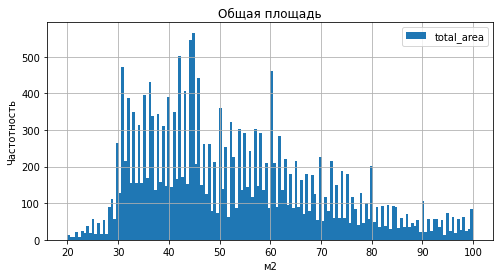

In [28]:
data.plot(y = 'total_area', kind = 'hist', bins=150, grid=True, figsize=(8,4), range=(20,100), title='Общая площадь')
plt.xlabel('м2')
plt.ylabel('Частотность');

***Вывод***

45 м2 - самая часто встречающаяся общая площадь квартиры. Пиковые значения 30, 45, 60 соответствуют большинству средних однокомнатных, двухкомнатных и трехкомнатных квартир.

Распределение по **общей площади** похоже на распределение Пуассона. Большинство предложений по квартирам общей площадью от 40 до 69 кв.м. Большой разброс данных: от 12 до 900 квадратных метров.

#### Жилая площадь

In [29]:
data['living_area'].describe()

count    23565.000000
mean        34.592277
std         22.373679
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

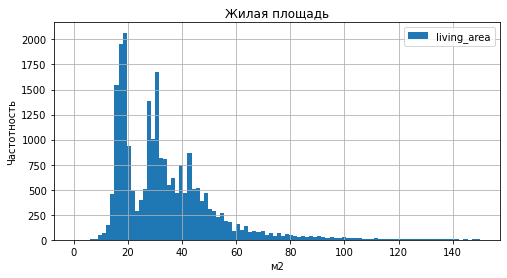

In [30]:
data.plot(
    y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,150), title = 'Жилая площадь'
)
plt.xlabel('м2')
plt.ylabel('Частотность');

Большинство предложений по квартирам **жилой площадью** от 19 до 42 кв.м. Большой разброс данных как и в общей площади: от 2 до 409 квадратных метров.

#### Площадь кухни

In [31]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.499898
std          6.037750
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

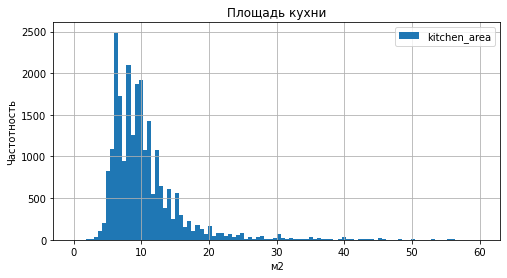

In [32]:
data.plot(
    y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,60), title = 'Площадь кухни'
)
plt.xlabel('м2')
plt.ylabel('Частотность');

Большинство предложений по квартирам с **площадью кухни** от 7 до 12 кв.м. Большой разброс данных как и в общей площади: от 1.3 до 112 квадратных метров.

#### Цена объекта

In [33]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

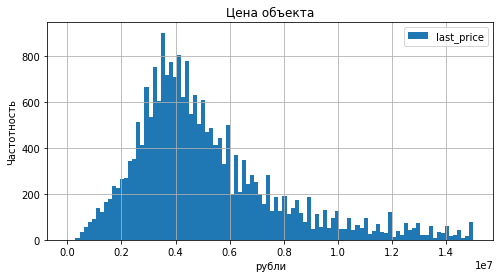

In [34]:
data.plot(
    y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (1,15000000), title = 'Цена объекта'
)
plt.xlabel('рубли')
plt.ylabel('Частотность');

**Цена объекта** распределена нормально. Есть выбросы, но они не сильно влияют на результат.

#### Количество комнат

In [35]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

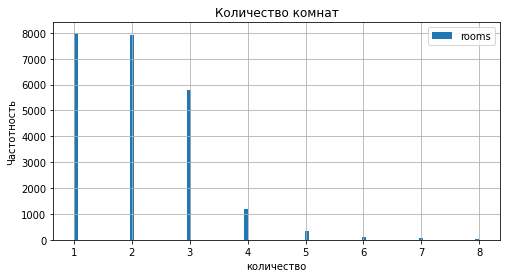

In [36]:
data.plot(
    y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (1,8), title = 'Количество комнат'
)
plt.xlabel('количество')
plt.ylabel('Частотность');

Наиболее распространены квартиры с **количеством комнат** 1 и 2.

#### Высота потолков

In [37]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.697798
std          0.232244
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

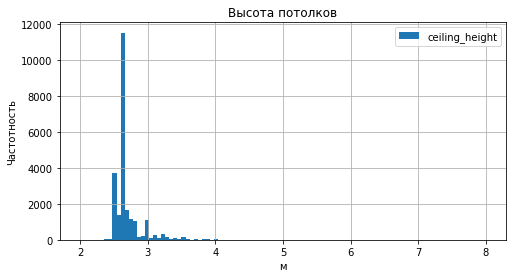

In [38]:
data.plot(
    y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (2,8), title = 'Высота потолков'
)
plt.xlabel('м')
plt.ylabel('Частотность');

После обработки данных получилось, что в большинстве **высота потолков** 2.6-2.7 метров. Это стандартная высота для обычных квартир.

#### Этаж

In [39]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

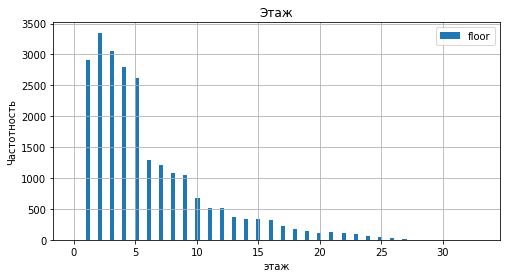

In [40]:
data.plot(
    y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,33), title = 'Этаж'
)
plt.xlabel('этаж')
plt.ylabel('Частотность');

**Этаж** чаще всего встречается второй. Распределение похоже на распределение Пуассона.

#### Тип этажа

In [41]:
data['floor_type'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object

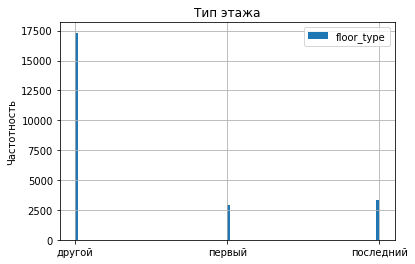

In [42]:
data['floor_type'].hist(bins=100, range=(0, 2))
plt.title('Тип этажа')
plt.ylabel('Частотность')
plt.legend(['floor_type']);

Первый и последний этажи продаются реже.

#### Всего этажей в доме

In [43]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

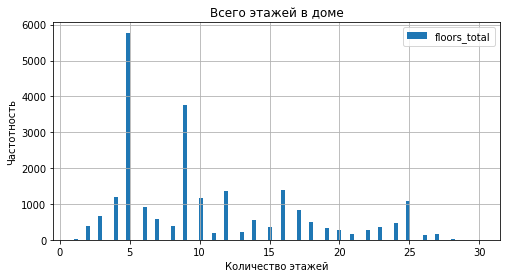

In [75]:
data.plot(
    y = 'floors_total', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (1,30), title = 'Всего этажей в доме'
)
plt.xlabel('Количество этажей')
plt.ylabel('Частотность');

5-ти и 9-ти этажки преобладают в датасете.

#### Расстояние до центра города в метрах

In [45]:
data['cityCenters_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

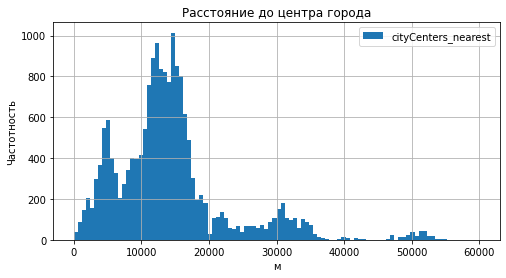

In [76]:
data.plot(
    y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (1,60000), title = 'Расстояние до центра города'
)
plt.xlabel('м')
plt.ylabel('Частотность');

Большинство квартир находится рядом с центром. Больше всего на расстоянии около 15 км.

#### Расстояние до ближайшего аэропорта

In [47]:
data['airports_nearest'].describe()

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

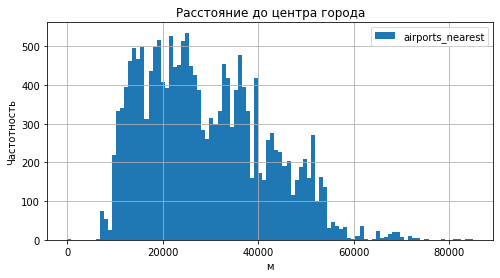

In [77]:
data.plot(
    y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,85000), title = 'Расстояние до центра города'
)
plt.xlabel('м')
plt.ylabel('Частотность');

Большинство квартир находится на расстоянии около от 10 км до 55 км.

#### Расстояние до ближайшего парка

In [49]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

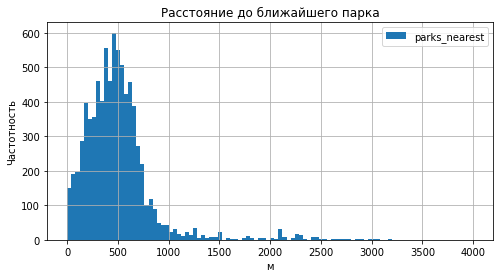

In [78]:
data.plot(
    y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (1,4000), title = 'Расстояние до ближайшего парка'
)
plt.xlabel('м')
plt.ylabel('Частотность');

Большинство квартир находится рядом с парками. Больше всего на расстоянии около 400 м.

#### День публикации объявления

data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [51]:
data['day_of_week'].describe()

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64

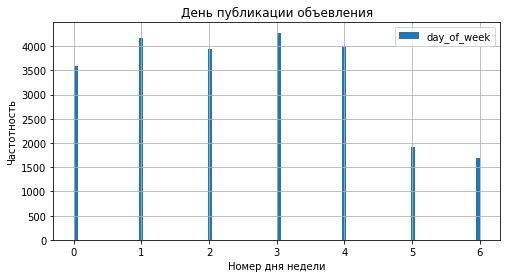

In [79]:
data.plot(
    y = 'day_of_week', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,6), title = 'День публикации объевления'
)
plt.xlabel('Номер дня недели')
plt.ylabel('Частотность');

В **субботу** и **воскресенье** публиковалось наименьшее количество объявлений. В будние дни примерно одинаковое количество публикаций.

#### Месяц публикации объявления

In [53]:
data['month'].describe()

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

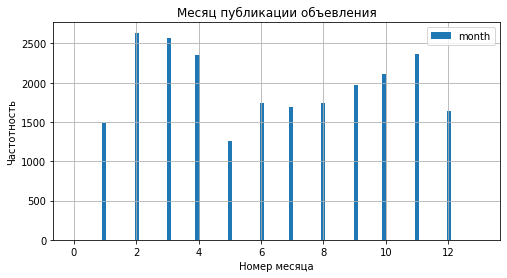

In [80]:
data.plot(
    y = 'month', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,13), title = 'Месяц публикации объевления'
)
plt.xlabel('Номер месяца')
plt.ylabel('Частотность');

В январе и мае много праздничных дней, думаю, поэтому количество объявлений тут меньше. Наибольшее количество объевлений выложено в феврале (люди отходят от празднования нового года и выкладывают информацию для продажи квартиры). Также прослеживается снижение появления новых объевлений в летние месяцы (сезон отпусков).

### Как быстро продавались квартиры.

In [55]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [56]:
data['days_exposition'].mean() # среднее

180.7413945278023

In [57]:
data['days_exposition'].median() # медиана

95.0

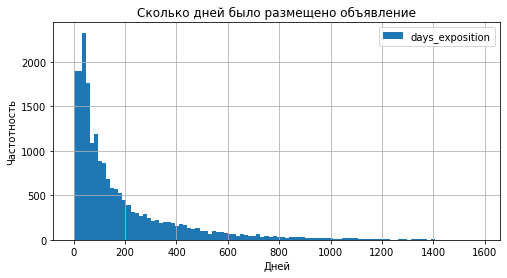

In [81]:
data.plot(
    y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,1580), title = 'Сколько дней было размещено объявление'
)
plt.xlabel('Дней')
plt.ylabel('Частотность');

Распределение похоже на распределение Пуассона. Выбросы редкие. Среднее значение - 180.74 дней, Медиана - 95 дней. Исходя из метода describe() можно сказать, что обычно продажа занимает 45-231 день. Долгие продажи - дольше 231 день. Быстрые - до 95 дней.
Где-то после 500 дней (около 1.5 лет) продажи совсем редкие. Их можно считать необычно долгими.

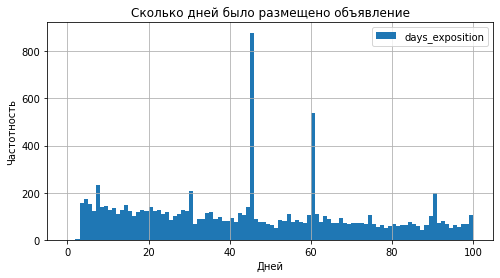

In [59]:
data.plot(
    y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (8,4), range = (0,100), title = 'Сколько дней было размещено объявление'
)
plt.xlabel('Дней')
plt.ylabel('Частотность');

Если рассмотреть гистограмму за первые 100 дней, увидим выбросы на 7, 30, 45, 60, 90. Похоже, что эти дни были связаны с тарифами. Например, сейчас платное размещение объявления на продажу квартиры расчитывается на 30 дней. Скорее всего через 30 дней продавец снимал объявление с продажи.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта.

#### Зависимость цены от общей площади

In [60]:
 pivot_table_total_area = data.pivot_table(
    index = 'total_area', values = 'last_price', aggfunc = ['median'])
print(pivot_table_total_area)
print('Коэффициент корреляции:', (data['total_area'].corr(data['last_price'])))

                 median
             last_price
total_area             
12.0          2400000.0
13.0          1850000.0
13.2          1686000.0
14.0          1190000.0
15.0          1725000.0
...                 ...
590.0        65000000.0
618.0       300000000.0
631.0       140000000.0
631.2       140000000.0
900.0       420000000.0

[2159 rows x 1 columns]
Коэффициент корреляции: 0.6536213939252808


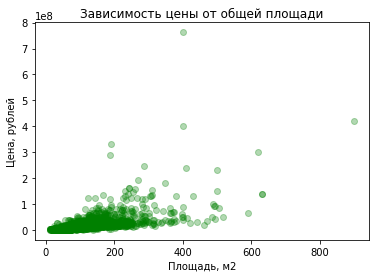

In [84]:
plt.scatter(data['total_area'], data['last_price'], alpha=0.3,
           c = 'green')
plt.title('Зависимость цены от общей площади')
plt.xlabel('Площадь, м2')
plt.ylabel('Цена, рублей');

***Вывод***

Большинство квартир с площадью до 300 м2.

Коэффициент корреляции 0,65 показывает, что есть зависимость между общей площадью и ценой на квартиру. **Чем больше площадь, тем выше цена.**

#### Зависимость цены от жилой площади

In [86]:
 pivot_table_living_area = data.pivot_table(
    index = 'living_area', values = 'last_price', aggfunc = ['median'])
print(pivot_table_living_area)

print('Коэффициент корреляции:', (data['living_area'].corr(data['last_price'])))

                  median
              last_price
living_area             
2.000000       4340000.0
3.000000      34715000.0
5.000000       2680000.0
5.400000       6100000.0
6.000000       3799000.0
...                  ...
332.000000    50000000.0
347.500000    91500000.0
360.410721   140000000.0
409.000000    65000000.0
409.700000   420000000.0

[2408 rows x 1 columns]
Коэффициент корреляции: 0.5856800396382067


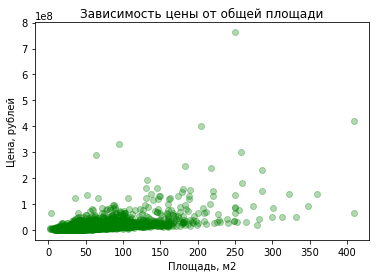

In [85]:
plt.scatter(data['living_area'], data['last_price'], alpha=0.3,
           c = 'green')
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Площадь, м2')
plt.ylabel('Цена, рублей');

Коэффициент корреляции 0,58 показывает, что есть зависимость между жилой площадью и ценой на квартиру, но не такая сильная как для общей площади квартиры. **Чем больше площадь, тем выше цена.**

#### Зависимость цены от площади кухни

In [89]:
 pivot_table_kitchen_area = data.pivot_table(
    index = 'kitchen_area', values = 'last_price', aggfunc = ['median'])
print(pivot_table_kitchen_area)

print('Коэффициент корреляции:', (data['kitchen_area'].corr(data['last_price'])))

                   median
               last_price
kitchen_area             
1.300000        4250000.0
2.000000        2720000.0
2.100895        2400000.0
2.275970        1850000.0
2.300000        2940000.0
...                   ...
93.200000      82400000.0
100.000000     65000000.0
100.700000     12500000.0
107.000000     85000000.0
112.000000    420000000.0

[1658 rows x 1 columns]
Коэффициент корреляции: 0.5145308032223361


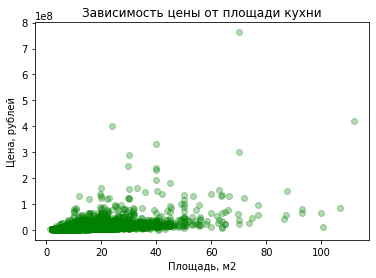

In [88]:
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.3,
           c = 'green')
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь, м2')
plt.ylabel('Цена, рублей');

Коэффициент корреляции 0,51 показывает, что есть зависимость между жилой площадью и ценой на квартиру еще меньше предыдущих двух зависимостей. **Чем больше площадь кухни, тем выше цена.**

#### Зависимость цены от количества комнат

          median      count
      last_price last_price
rooms                      
0        2700000        194
1        3600000       8004
2        4768714       7897
3        6200000       5779
4        9000000       1172
5       14000000        325
6       19000000        104
7       24900000         59
8       23095000         12
9       23750000          8
10      23000000          3
11      25250000          2
12     420000000          1
14      26829500          2
15      65000000          1
16      28500000          1
19      32250000          1
Коэффициент корреляции: 0.3631905485065752


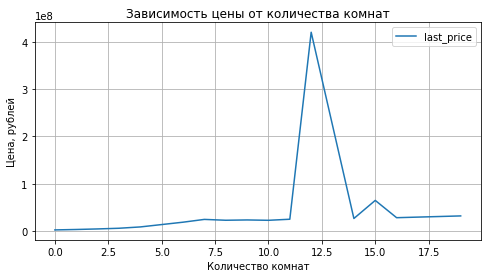

In [64]:
 pivot_table_rooms = data.pivot_table(
    index = 'rooms', values = 'last_price', aggfunc = ['median', 'count'])
print(pivot_table_rooms)

pivot_table_rooms.plot(
    y = 'median', grid=True, figsize = (8,4), title = 'Зависимость цены от количества комнат'
)
plt.xlabel('Количество комнат')
plt.ylabel('Цена, рублей')

print('Коэффициент корреляции:', (data['rooms'].corr(data['last_price'])))

Коэффициент корреляции 0,36 показывает, что есть зависимость между жилой площадью и ценой на квартиру меньше зависимости от площади. **Чем больше площадь, тем выше цена.** В датасете есть одна 12-ти комнатная квартира с самой высокой ценой, в 10 раз больше, чем у 11-ти и 14-ти комнатных.

In [65]:
data.query('rooms == 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_week,month,year,floor_type,center_km
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,NaN,2,318.0,106.0,466666,2,12,2017,последний,7


Квартира с двенадцатью комнатами похоже относится к очень дорогим. У нее самая большая площадь, находится на 25 этаже, 7 км от центра. Ее можно не учитывать.

#### Зависимость цены от этажа

In [66]:
 pivot_table_floor_type = data.pivot_table(
    index = 'floor_type', values = 'last_price', aggfunc = ['median'])
print(pivot_table_floor_type)



               median
           last_price
floor_type           
другой        4848500
первый        3900000
последний     4300000


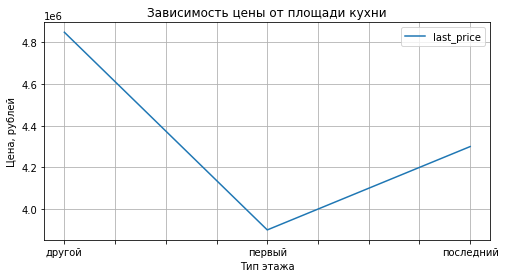

In [90]:
pivot_table_floor_type.plot(
    y = 'median', grid=True, figsize = (8,4), title = 'Зависимость цены от площади кухни'
)
plt.xlabel('Тип этажа')
plt.ylabel('Цена, рублей');

На первом и последнем этаже квартиры дешевле.

#### Зависимость цены от дня недели в дате размещения

               last_price
day_of_week              
0            6.518332e+06
1            6.389281e+06
2            6.630246e+06
3            6.706766e+06
4            6.359714e+06
5            6.986165e+06
6            6.242137e+06
Коэффициент корреляции: 0.0013569211122710745


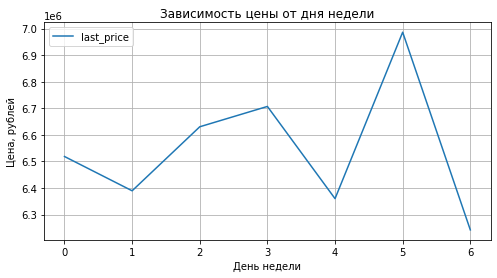

In [68]:
 pivot_table_day_of_week = data.pivot_table(
    index = 'day_of_week', values = 'last_price')
print(pivot_table_day_of_week)

pivot_table_day_of_week.plot(
    grid=True, figsize = (8,4), title = 'Зависимость цены от дня недели'
)
plt.xlabel('День недели')
plt.ylabel('Цена, рублей')

print('Коэффициент корреляции:', (data['day_of_week'].corr(data['last_price'])))

Коэффициент корреляции 0,001 показывает, что зависимости между днем недели и ценой практически нет.

#### Зависимость цены от месяца в дате размещения

         last_price
month              
1      6.664171e+06
2      6.463941e+06
3      6.359922e+06
4      6.743395e+06
5      6.591127e+06
6      6.316913e+06
7      6.639479e+06
8      6.345784e+06
9      6.838447e+06
10     6.236776e+06
11     6.449083e+06
12     7.005343e+06
Коэффициент корреляции: 0.0027259571647347564


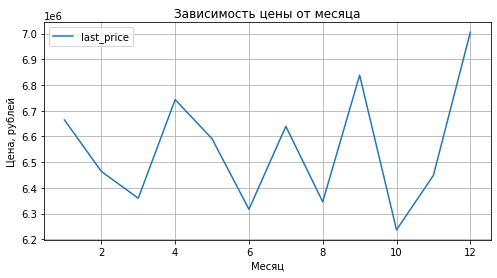

In [69]:
 pivot_table_month = data.pivot_table(
    index = 'month', values = 'last_price')
print(pivot_table_month)

pivot_table_month.plot(
    grid=True, figsize = (8,4), title = 'Зависимость цены от месяца'
)
plt.xlabel('Месяц')
plt.ylabel('Цена, рублей')

print('Коэффициент корреляции:', (data['month'].corr(data['last_price'])))

Коэффициент корреляции 0,002 показывает, что зависимости между месяцем и ценой практически нет.

#### Зависимость цены от года в дате размещения

         median      count
     last_price last_price
year                      
2014    7640000        136
2015    5300500       1166
2016    4530000       2745
2017    4500000       8161
2018    4550000       8486
2019    5050000       2871
Коэффициент корреляции: -0.04286415271361106


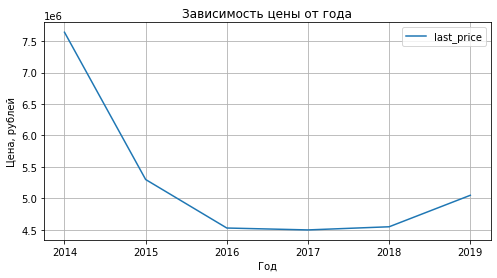

In [70]:
 pivot_table_year = data.pivot_table(
    index = 'year', values = 'last_price', aggfunc = ['median', 'count'])
print(pivot_table_year)

pivot_table_year.plot(
    y = 'median', grid=True, figsize = (8,4), title = 'Зависимость цены от года'
)
plt.xlabel('Год')
plt.ylabel('Цена, рублей')

print('Коэффициент корреляции:', (data['year'].corr(data['last_price'])))

           mean      count
     total_area total_area
year                      
2014  86.225956        136
2015  71.584563       1166
2016  62.129938       2745
2017  60.697526       8161
2018  57.701893       8486
2019  59.475991       2871
Коэффициент корреляции: -0.07904067205888969


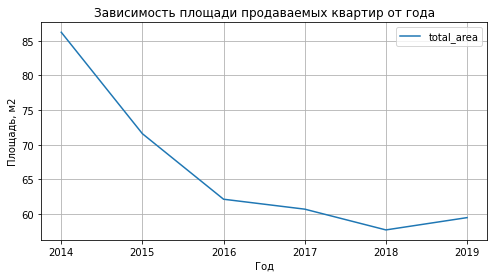

In [95]:
pivot_table_year_total_area = data.pivot_table(
    index = 'year', values = 'total_area', aggfunc = ['mean', 'count'])
print(pivot_table_year_total_area)

pivot_table_year_total_area.plot(
    y = 'mean', grid=True, figsize = (8,4), title = 'Зависимость площади продаваемых квартир от года'
)
plt.xlabel('Год')
plt.ylabel('Площадь, м2')

print('Коэффициент корреляции:', (data['year'].corr(data['total_area'])))

***Вывод:***


Коэффициент корреляции -0,04 показывает, что зависимость слабая. Отрицательная корреляция показывает: чем раньше год, тем выше цена. 

За 2014 год есть только 136 значений в датасете. Средняя площадь квартир по годам изменялась аналогично цене. Т.е. можно предположить, что на графиках отражается прямая зависимость цены от площади квартиры.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [71]:
top10 = data.groupby('locality_name').count().sort_values(by='square_meter_price', ascending=False).head(10)
top10['square_meter_price'] # количество объявлений в 10 населенных пунктах с наибольшим числом объявлений

locality_name
Санкт-Петербург      15651
Мурино                 586
Кудрово                470
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: square_meter_price, dtype: int64

In [72]:
top10_square_meter_price = data.query('locality_name in @top10.index').pivot_table(values='square_meter_price', index='locality_name')
top10_square_meter_price = top10_square_meter_price.astype(int)
top10_square_meter_price.sort_values('square_meter_price', ascending=False)

,square_meter_price
locality_name,
Санкт-Петербург,114868
Пушкин,103125
Кудрово,95260
поселок Парголово,90175
Мурино,86040
поселок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


Наибольшая цена квардатного метра в Санкт-Петербурге и Пушкине. Наименьшая - в Выборге.

In [73]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15651,5500000.0
Мурино,586,3400000.0
Кудрово,470,3887500.0
поселок Шушары,439,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
поселок Парголово,327,4100000.0
Гатчина,307,3100000.0


### Средняя цена километра (center_km)

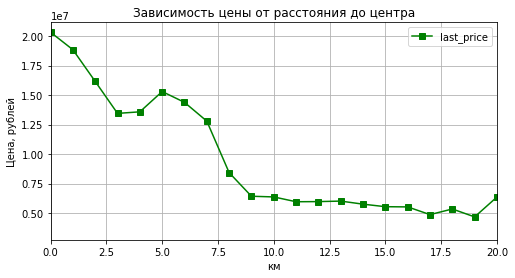

In [74]:
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
pivot_table_center_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price')
pivot_table_center_km.plot(grid=True, style='s-', color = 'g', xlim=(0,20), figsize=(8, 4))
plt.xlabel('км')
plt.ylabel('Цена, рублей')
plt.title('Зависимость цены от расстояния до центра');

Наибольшая цена за квадратный метр в центре Санкт-Петербурга до 7 км. Потом наблюдается резкий спад.

## Общий вывод

При работе с данными были выявлены пропущенные значения. Пропущенные данные, составляющие незначительную часть датасета были удалены. Высота потолков проанализирована, выбивающиеся и пропущенные данные заменены на медианные значения. С помощью графиков проведен анализ зависимостей.

Прослеживается прямая зависимость между ценой и общей площадью, жилой площадью, площадью кухни. Цена квартир зависит от количества комнат меньше, чем от площади квартиры.
Квартиры, которые находятся не на первом и не на последнем этажах, дороже.

День и месяц на стоимость влияют незначительно.

В 2014 году квартиры подорожали, потом был спад цен до 2018 года.

Самые дорогие квартиры продавались в центре Санкт-Петербурга (до 7 км от центра города).
